# Import Necessary Libraries

In [72]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and Preprocess the Data

In [73]:
# Define the paths to the training and testing data files
train_data_dir = pd.read_csv('./MNIST/mnist_train.csv')
test_data_dir =  pd.read_csv('./MNIST/mnist_test.csv')

In [74]:
y_train = train_data_dir['label']
x_train = train_data_dir.drop(['label'], axis=1)

In [75]:
y_test = test_data_dir['label']
x_test = test_data_dir.drop(['label'], axis=1)
y_test.shape

(10000,)

In [76]:
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000,28,28,1))

In [77]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


In [78]:
# Load the MNIST dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add the channel dimension (for grayscale images)
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [79]:

# Normalize the data to have values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Define the CNN Model

In [80]:
model = Sequential()

# First convolutional layer with 32 filters, kernel size of (3,3), and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2))) # First max-pooling layer with a pool size of (2,2)

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2))) # Second max-pooling layer

# Third convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flattening the output to connect it to dense layers
model.add(Flatten())

# Adding a fully connected layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 10 neurons (one for each digit) and softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))


C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [81]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train the Model

In [82]:
H = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.8314 - loss: 0.5287 - val_accuracy: 0.9809 - val_loss: 0.0632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9771 - loss: 0.0848 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9827 - loss: 0.0610 - val_accuracy: 0.9905 - val_loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9869 - loss: 0.0469 - val_accuracy: 0.9915 - val_loss: 0.0298
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9896 - loss: 0.0364 - val_accuracy: 0.9908 - val_loss: 0.0360
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9907 - loss: 0.0312 - val_accuracy: 0.9917 - val_loss: 0.0324
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9914 - loss: 0.0311 - val_accuracy: 0.9916 - val_loss: 0.0323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9934 -

# Evaluate the Model

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9887 - loss: 0.0414
Test Accuracy: 0.9919000267982483


# Plotting Accuracy and Loss

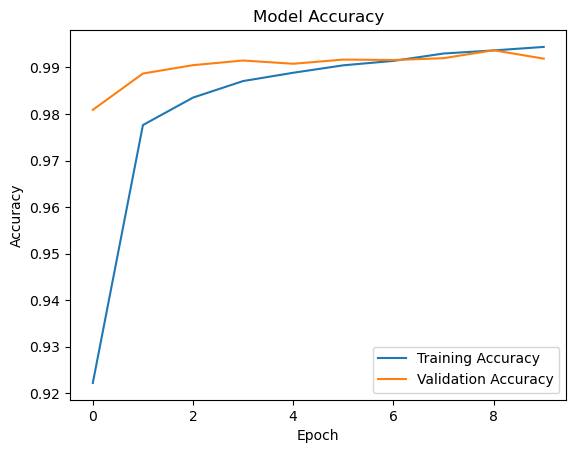

In [84]:
# Plot training & validation accuracy
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


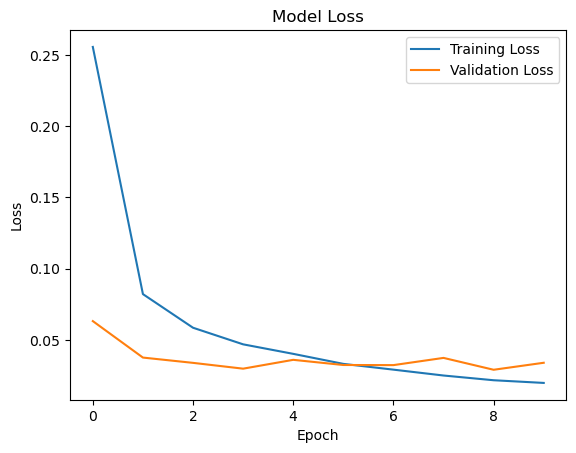

In [85]:
# Plot training & validation loss
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()